<a href="https://colab.research.google.com/github/azzazhr/Machine_Learning/blob/main/Azzahra_Attaqina_UTS1_Tugas1(07).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Nama : Azzahra Attaqina**

### **NIM  : 2341720224**

### **Kelas : TI-3B**

**UTS 1 (TUGAS 1 - ABSEN 07)**

# **Import Library**

**Menginstall Annoy Terlebih Dahulu**

In [ ]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 32.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551812 sha256=674b4cda519aa32c44b56470b3a94eeb2a66b7f09348d52fc52a1074c5865254
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


In [ ]:
# 1. Library
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from annoy import AnnoyIndex
import matplotlib.pyplot as plt
import seaborn as sns


# **Load Dataset**

In [ ]:
# 2. Upload Dataset ke Colab
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/ML2025/train.csv')
df.info() #Menampilkan informasi struktur data frame
df.describe() #Menampilkan statistik deskriptif dari kolom numerik
df.head() #Menampilkan 5 baris pertama dari data frame


Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-nu

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# **Mengecek Kolom Apa Yang Memiliki Missing Values**

In [ ]:
# cek missing
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
print("\nKolom yang memiliki missing values :")
missing



Kolom yang memiliki missing values :


,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


# **Data Preprocessing**

In [ ]:
# 3. Data Preprocessing
# Tangani missing values (hanya untuk numeric)
num_cols = df.select_dtypes(include=['float64','int64']).columns #Memilih semua kolom dari df yang tipe datanya adalah angka (float64 atau int64)
df[num_cols] = df[num_cols].fillna(df[num_cols].mean()) #Mengisi sel yg kosong dengan nilai rata-rata (mean)

# cek jumlah missing values per kolom
print("Jumlah missing values setelah imputasi:\n")
print(df[num_cols].isnull().sum()) #Mengecek jumlah missing values di kolom numerik untuk memastikan semuanya sudah terisi.

# Buat fitur baru
df['TotalFlrSF'] = df['1stFlrSF'] + df['2ndFlrSF'] #Total luas lantai
print("\nContoh hasil fitur baru TotalLuasLantai:")
print(df[['1stFlrSF','2ndFlrSF','TotalFlrSF']].head())

df['TotalArea'] = df['GrLivArea'] + df['TotalBsmtSF']
print("\nContoh hasil fitur baru TotalArea:")
print(df[['GrLivArea','TotalBsmtSF','TotalArea']].head()) #Menampilkan 5 baris pertama

# Normalisasi data numerik - mengubah data numerik supaya memiliki skala yang sama.
num_df = df[num_cols]
scaler = StandardScaler() #Membuat objek StandardScaler
X_scaled = scaler.fit_transform(num_df) #Menerapkan normalisasi.


Jumlah missing values setelah imputasi:

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

Contoh hasil fitur baru TotalLuasLantai:
   1stFlrSF  2ndFlrSF  TotalFlrSF
0       856       854        1710
1      1262         0        1262
2       920       866        1786
3       961       756        1717
4      1145 

# **Clustering dengan KMeans dan DBSCAN**

In [ ]:
# 4. Clustering dengan KMeans dan DBSCAN
# KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # 3 cluster, memastikan hasilnya akan sama persis, menjalankan algoritma 10 kali dengan titik awal berbeda dan memilih yang terbaik.
labels_kmeans = kmeans.fit_predict(X_scaled) #menghasilkan label cluster untuk setiap baris data.

# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5) #jarak maksimum antar titik untuk dianggap bertetangga, jumlah tetangga minimum yang harus dimiliki sebuah titik
labels_dbscan = dbscan.fit_predict(X_scaled) #memberikan label cluster untuk setiap titik data.

# Evaluasi
# Mengukur kualitas cluster
print("KMeans Silhouette:", silhouette_score(X_scaled, labels_kmeans)) #semakin besar semakin bagus
print("KMeans Davies-Bouldin:", davies_bouldin_score(X_scaled, labels_kmeans)) #semakin kecil semakin bagus

# Cek jumlah cluster DBSCAN
n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0) #menghitung jumlah cluster unik yang ditemukan
print("Jumlah cluster DBSCAN:", n_clusters_dbscan)

if n_clusters_dbscan >= 2: #dihitung jika ada setidaknya 2 cluster
    print("DBSCAN Silhouette:", silhouette_score(X_scaled, labels_dbscan))
    print("DBSCAN Davies-Bouldin:", davies_bouldin_score(X_scaled, labels_dbscan))
else:
    print("DBSCAN tidak menghasilkan >=2 cluster valid, metrik tidak bisa dihitung.")


KMeans Silhouette: 0.1344057358148922
KMeans Davies-Bouldin: 2.523271079320086
Jumlah cluster DBSCAN: 0
DBSCAN tidak menghasilkan >=2 cluster valid, metrik tidak bisa dihitung.


# **Visualisasi Clustering dengan 2D**

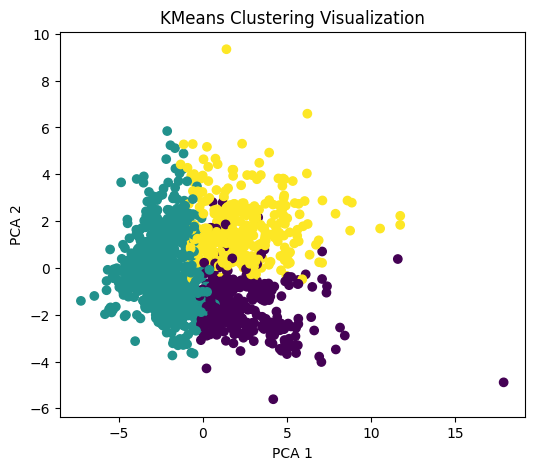

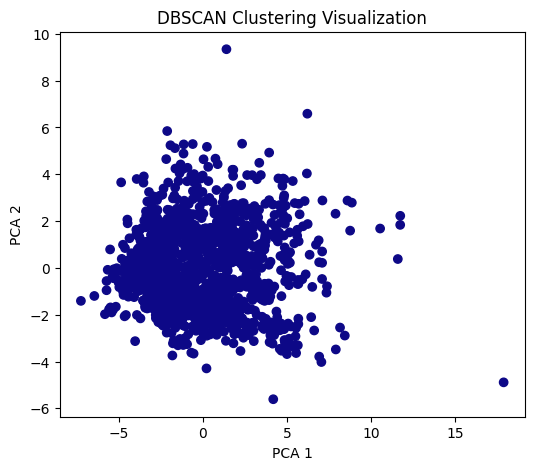

In [ ]:
# 5. Visualisasi Clustering (2D)
pca = PCA(n_components=2) #Membuat objek PCA, dan hanya mengambil 2 komponen utama
X_pca = pca.fit_transform(X_scaled) #Mencari arah komponen utama, lalu data X_scaled diproyeksikan ke sumbu/arah baru tersebut.

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans, cmap='viridis') # 0 = X, 1 =Y
plt.title("KMeans Clustering Visualization")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_dbscan, cmap='plasma')
plt.title("DBSCAN Clustering Visualization")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


# **Implementasi ANN**

In [ ]:
import random

dim = X_scaled.shape[1] #jumlah fitur (kolom) pada data X_scaled.
ann = AnnoyIndex(dim, 'euclidean') #jarak euclidean

# Build index - menyiapkan struktur data agar pencarian nearest neighbor bisa dilakukan lebih cepat & efisien.
for i in range(X_scaled.shape[0]):
    ann.add_item(i, X_scaled[i]) #masukkan data
ann.build(10) #membangun index dengan 10

# Pilih 3–5 query point acak
query_indices = random.sample(range(X_scaled.shape[0]), 3)

for query_idx in query_indices:
    neighbors, distances = ann.get_nns_by_item(query_idx, 6, include_distances=True) #Cari 6 tetangga terdekat
    print(f"\nQuery Point Index: {query_idx}")
    print("Nearest Neighbors and Distances:") #index tetangga terdekat dan jarak euclidean
    for n, d in zip(neighbors, distances):
        print(f"Neighbor Index: {n} | Distance: {d:.4f} | Cluster (KMeans): {labels_kmeans[n]}")



Query Point Index: 81
Nearest Neighbors and Distances:
Neighbor Index: 81 | Distance: 0.0000 | Cluster (KMeans): 0
Neighbor Index: 483 | Distance: 2.6483 | Cluster (KMeans): 0
Neighbor Index: 775 | Distance: 3.3537 | Cluster (KMeans): 0
Neighbor Index: 1193 | Distance: 4.4645 | Cluster (KMeans): 0
Neighbor Index: 282 | Distance: 4.5294 | Cluster (KMeans): 0
Neighbor Index: 474 | Distance: 4.7700 | Cluster (KMeans): 0

Query Point Index: 793
Nearest Neighbors and Distances:
Neighbor Index: 793 | Distance: 0.0000 | Cluster (KMeans): 0
Neighbor Index: 864 | Distance: 2.1410 | Cluster (KMeans): 0
Neighbor Index: 805 | Distance: 2.3990 | Cluster (KMeans): 0
Neighbor Index: 388 | Distance: 2.5527 | Cluster (KMeans): 0
Neighbor Index: 933 | Distance: 2.6134 | Cluster (KMeans): 0
Neighbor Index: 1082 | Distance: 2.7301 | Cluster (KMeans): 0

Query Point Index: 490
Nearest Neighbors and Distances:
Neighbor Index: 490 | Distance: 0.0000 | Cluster (KMeans): 1
Neighbor Index: 243 | Distance: 2.65